# Introduction to non-smooth problems and proximal methods 

## Non-smooth convex optimization problem

$$
\min_{x \in \mathbb{R}^n} f(x),
$$

where $f(x)$ is convex, but **non-smooth**.

**Q:** since gradient does not exist, what method can solve

such problem? 

## Subgradient method

- Replace gradient with subgradient 
- Original book is [Minimization methods for non-differentiable functions](http://cds.cern.ch/record/104965) by [Naum Shor](https://ru.wikipedia.org/wiki/%D0%A8%D0%BE%D1%80,_%D0%9D%D0%B0%D1%83%D0%BC_%D0%97%D1%83%D1%81%D0%B5%D0%BB%D0%B5%D0%B2%D0%B8%D1%87)
- Good review in old-scvhool style is [here](https://core.ac.uk/download/pdf/33892291.pdf#page=15)
- Compare the method with gradient descent

### Non-descent method

- Example

$$
f(x_1, x_2) = |x_1| + 2|x_2|
$$

- At $x = (1, 0)$ a subgradient is $(1, 2)$
- The direction $-g$ is not descent

## Any good news?

- Let us estimate convergence of the subgradient method 
- $\|x_{k+1} - x^*\|^2_2 = \|x_k - \alpha_k g_k - x^*\|_2^2 \leq \|x_k - x^*\|^2_2 - 2\alpha_k g^{\top}_k(x_k - x^*) + \alpha^2_k \|g\|_2^2 \leq \|x_k - x^*\|^2_2 - 2\alpha_k (f(x_k) - f^*) + \alpha^2_k \|g\|_2^2$
- Use the minimum function value after $k$ iterations $f_{best}^{(k)}$

$$
2 \left(\sum_{i=1}^k \alpha_i\right) (f^{(k)}_{best} - f^*) \leq \| x_0 - x^*\|_2^2 - \|x_k - x^* \|_2^2 + \sum_{i=1}^k \alpha^2_i \|g_i\|_2^2 \leq \| x_0 - x^*\|_2^2 + \sum_{i=1}^k \alpha^2_i \|g_i\|_2^2
$$

- Finally

$$
f^{(k)}_{best} - f^* \leq \frac{\| x_0 - x^*\|_2^2 + \sum_{i=1}^k \alpha^2_i \|g_i\|_2^2}{2\sum_{i=1}^k \alpha_i}
$$

## Step size selection

- Fix step size $\alpha$

$$
f^{(k)}_{best} - f^* \leq \frac{\| x_0 - x^*\|_2^2 + G^2 k \alpha^2}{2 k \alpha} = \frac{\| x_0 - x^*\|_2^2}{2 k \alpha} + \frac{G^2 \alpha}{2},
$$

where $\|g_i\|_2 \leq G$

- Scaled gradient norm $\alpha_i = \frac{s}{\|g_{i}\|_2}$

$$
f^{(k)}_{best} - f^* \leq \frac{G\| x_0 - x^*\|_2^2}{2 k s} + \frac{G s}{2},
$$

- Diminishing step size: $\alpha_i \to 0, \sum_{i=1}^{\infty}\alpha_i = \infty$

$$
f^{(k)}_{best} - f^* \to 0. \quad k \to \infty
$$

## Test problem

$$
\|Ax - b\|_1 \to \min_x
$$

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc("text", usetex=True)
import ipywidgets as ipywidg
import liboptpy.unconstr_solvers as methods
import liboptpy.step_size as ss


m, n = 500, 100
A = np.random.randn(m, n)
x_true = np.random.randn(n)
b = A.dot(x_true)

In [10]:
f = lambda x: np.linalg.norm(A.dot(x) - b, 1)
subgrad = lambda x: A.T.dot(np.sign(A.dot(x) - b))
alpha = 1e-3
s = 1e-1
sg_methods = {
    "SM 1/k": methods.fo.SubgradientMethod(f, subgrad, ss.InvIterStepSize()),
    "SM fixed={}".format(alpha): methods.fo.SubgradientMethod(f, subgrad, ss.ConstantStepSize(alpha)),
    "SM scaled fix, s={}".format(s): methods.fo.SubgradientMethod(f, subgrad, 
                                                  ss.ScaledConstantStepSize(s)),
}

In [11]:
x0 = np.random.randn(n)
max_iter = 500

In [12]:
for m in sg_methods:
    _ = sg_methods[m].solve(x0=x0, max_iter=max_iter)

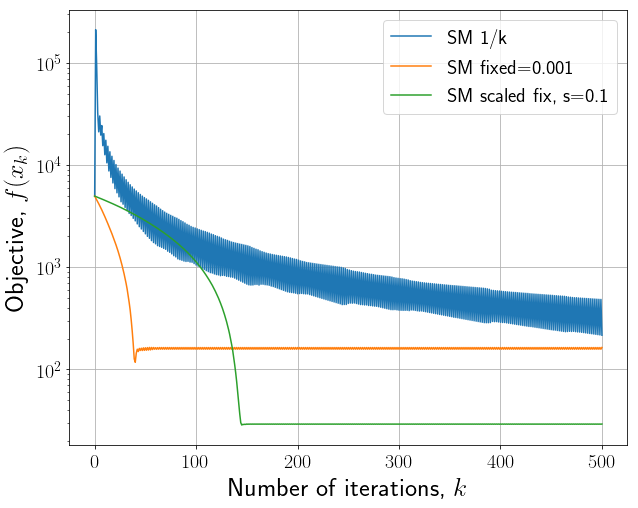

In [13]:
plt.figure(figsize=(10, 8))
for m in sg_methods:
    plt.semilogy([f(x) for x in sg_methods[m].get_convergence()], label=m)
plt.legend(fontsize=20)
plt.xlabel(r"Number of iterations, $k$", fontsize=26)
plt.ylabel(r"Objective, $f(x_k)$", fontsize=26)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)

## Summary on subgradient method

- Black-box method for non-smooth function
- Natural generalization of gradient descent
- But it is not descent method :(
- Step size selection rules

## Gradient descent as forward Euler scheme

Consider the following ODE

$$
\frac{dx}{dt} = -f'(x(t))
$$

and after discretization

$$
\frac{x_{k+1} - x_k}{\alpha} = -f'(x_k),
$$

where $\alpha = t_{k+1} - t_k$ is a grid step and $x_k \equiv x(t_k)$

From this follows 

$$
x_{k+1} = x_k - \alpha f'(x_k),
$$

which is equivalent to gradient descent method

### Properties of forward Euler scheme

- Easy to use
- Can be unstable if $\alpha$ is too large, which is natural drawback of gradient descent with large step size
- Stability issue can be solved with **backward Euler scheme**

## Proximal method as backward Euler scheme

$$
\frac{dx}{dt} = -f'(x(t))
$$

and after discretization in backward manner

$$
\frac{x_{k+1} - x_k}{\alpha} = -f'({\color{red}{x_{k+1}}}),
$$

After some re-arrangements

\begin{align*}
& \left(\frac{1}{2\alpha} \|u - x_k\|_2^2 + f(u) \right)'(x_{k+1}) = 0 \\
& x_{k+1} = \arg\min_u \left(f(u) + \frac{1}{2\alpha} \|u - x_k\|_2^2\right) = prox_{\alpha f}(x_k)
\end{align*}



### Example: iterative refinement

The method to solve positive semi-definite linear system given Cholesky factorization of $A + \epsilon I$ for some $\epsilon$
$$
f(x) = \frac{1}{2}x^{\top}Ax - b^{\top}x \to \min_x,
$$
where $A \in \mathbb{S}^n_+$

\begin{align*}
prox_{\alpha f} (x_k) & = \arg\min_u \left(\frac{1}{2}u^{\top}Au - b^{\top}u + \frac{1}{2\alpha} \|u - x_k\|_2^2\right) \\
& = \left(A + (1/ \alpha) I\right)^{-1}\left(b + (1 / \alpha)x_k\right) \\
& = x_k + (A + \epsilon I)^{-1}(b - Ax_k)
\end{align*}


### Properties of proximal map 
$$
x_{k+1} = prox_{f}(x_k)
$$

1. Fixed point of proximal operator is equal to minimizer of $f$

$$
x^* = prox_f(x^*)
$$ 

Proximal map is not a contraction

There exists theory on firm non-expansiveness of proximal operator

2. Resolvent of operator

$$
prox_{\alpha f}(x) = (I + \alpha f')^{-1}(x)
$$

This property can be extended to subdifferential.

### Modified gradient step interpretation

Assume $f$ is twice differentiable and strong convex ($f''(x) \succ 0$).

1. Gradient method as approximation of proximal method

$$
x_{k+1} = prox_{\alpha f} (x_k) = (I + \alpha f')^{-1}(x_k) \approx x_k - \alpha f'(x_k) + o(\alpha), \; \alpha \to 0  
$$

2. Proximal method for second-order approximation $\hat{f}(v) = f(x) + \langle f'(x), v - x \rangle + \frac{1}{2}\langle v - x, f''(x) (v - x) \rangle$

$$
prox_{\alpha \hat{f}}(x_k) = x_k - (f''(x_k) + (1 / \alpha)I)^{-1}f'(x_k) 
$$

### Separable sum

If $f$ has the form

$$
f(x) = \sum_{i=1}^n f_i(x_i)
$$

then 
$$
prox_f(v)_i = prox_{f_i}(v_i)
$$

- High parallelization of the proximal operator computing 
- **Consensus form** of the problem
$$
\min \sum_{i=1}^n f_i(x) \to \min \sum_{i=1}^n f_i(x_i), \; \text{s.t. } x_1 = \ldots = x_n
$$

## Proximal gradient method (PGM) - look into black box

Consider convex function $f$ such that

$$
f(x) = h(x) + g(x),
$$

where $h(x)$ is convex differentiable, and $g(x)$ can be convex extended-value function, so $g: \mathbb{R}^n \to \mathbb{R} \cup \{+\infty\}$

Then the one step of the proximal gradient method is

$$
x_{k+1} = prox_{\alpha_k g} (x_k - \alpha_k h'(x_k))
$$

- Convergence rate $\mathcal{O}(1/k)$ for step size $\alpha_k \equiv \alpha \in (0, 1/L]$, where $L$ is Lipschitz constant of $f'$
- Backtracking procedure is available for adaptive search of $\alpha_k$

### Pacticular cases of PGM

- If $h \equiv 0$, then PGM is simple proximal method
- If $g \equiv 0$, then PGM is vanilla gradient descent method 

### Fixed point iteration interpretation

From the first-order optimality condition follows

\begin{align*}
& 0 \in \alpha h'(x^*) + \alpha\partial g(x^*)\\
& 0 \in \alpha h'(x^*) + x^* - x^* + \alpha\partial g(x^*)\\
& (I - \alpha h')(x^*) \in (I + \alpha \partial g)(x^*)\\
& x^* = (I + \alpha \partial g)^{-1}(I - \alpha h')(x^*)\\
& x^* = prox_{\alpha g}(x^* - \alpha h'(x^*))
\end{align*}

## Accelerated proximal gradient method

\begin{align*}
& y_{k+1} = x_k + w_k (x_k - x_{k+1})\\
& x_{k+1} = prox_{\alpha_k g} (y_{k+1} - \alpha_k h'(y_{k+1}))
\end{align*}

- $\{w_k\}$ is special sequence that has to be chosen to accelerate convergence, for example $w_k = \frac{k}{k+3}$
- Similar backtracking procedure is helpful for adaptive search $\alpha_k$
- Convergence rate $\mathcal{O}(1/k^2)$ which is tight lower bound for convex function

## Lasso example

$$
\min_x \frac{1}{2}\|Ax - y \|^2_2 + \gamma \|x\|_1
$$

- $h(x) = \frac{1}{2}\|Ax - y \|^2_2$
- $g(x) = \gamma \|x\|_1$

####  Soft thresholding

- $\|x\|_1 = |x_1| + \ldots + |x_n|$
- Separable sum
- $prox_{\alpha \|x\|_1} (x)_i = prox_{\alpha |\cdot|}(x_i)$
- $prox_{\alpha |\cdot|} (x_i) = \arg\min_u (|u| + 1/(2\alpha)\|x_i - u\|^2_2)$
- Analytical solution
$$ 
prox_{\alpha |\cdot|} (x_i) = \begin{cases} x_i - \alpha & x_i \geq \alpha  \\ 0 & |x_i| \leq \alpha \\ x_i + \alpha & x_i \leq -\alpha \end{cases}
$$
- Vectorized form
$$
prox_{\alpha \|x\|_1} (x) = \text{sign}(x)(|x| - \alpha)_+, \; |x| = (|x_1|, \ldots, |x_n|)
$$

####  (F)ISTA

- Proximal gradient method for Lasso problem is known as ISTA (Iterative shrinkage-thresholding algorithm)
- Fast proximal gradient is known as FISTA (Fast ISTA)

### Experiments

In [18]:
def prox_alg(f, f_grad, g_prox, x0, num_iter, beta=0.5, fix_lam=None, accel=False):
    conv = [x0]
    x = x0.copy()
    if accel:
        t_prev = 1
        t_next = (1 + np.sqrt(1 + 4 * t_prev**2)) / 2.
    if fix_lam is None:
        lam = 1.
    for i in range(num_iter):
        if accel and i > 0:
            x = x + (t_prev - 1) / t_next * (x - conv[-2])
            t_prev = t_next
            t_next = (1 + np.sqrt(1 + 4 * t_prev**2)) / 2.
        if fix_lam is None:
            while True:
                z = g_prox(x - lam * f_grad(x), lam)
                if f(z) <= f(x) + f_grad(x).dot(z - x) + np.linalg.norm(z - x)**2 / (2 * lam):
                    break
                else:
                    lam = lam * beta
        else:
            z = g_prox(x - fix_lam * f_grad(x), fix_lam)
        x = z.copy()
        conv.append(x)
    return x, conv

In [19]:
f = lambda x: np.linalg.norm(A.dot(x) - y)**2 / 2
f_grad = lambda x: A.T.dot(A.dot(x) - y)
f_subgrad = lambda x: A.T.dot(A.dot(x) - y) + gamma * np.sign(x)

def g_prox(h, lam):
    return np.sign(h) * np.maximum(np.abs(h) - lam * gamma, 0) 

In [20]:
import sklearn.preprocessing as skprep
m = 500
n = 2500
A = np.random.rand(m, n)
A = skprep.normalize(A, norm="l2", axis=0)
L = np.linalg.eigvalsh(A.T.dot(A)).max()
x_true = np.random.randn(n)
x_true[np.random.rand(n) < 0.96] = 0
print("Number of nonzeros in x_true = {}".format(np.sum(x_true != 0)))
v = 9e-2 * np.random.randn(m)
y = A.dot(x_true) + v
gamma_max = np.linalg.norm(A.T.dot(y), ord=np.inf)
gamma = 0.1 * gamma_max
print("Gamma = {}".format(gamma))
print("S2N ratio = {}".format(np.linalg.norm(A.dot(x_true))**2 / np.linalg.norm(v)**2))
f_star = f(x_true) + gamma*np.linalg.norm(x_true, 1)

Number of nonzeros in x_true = 94
Gamma = 0.7881955783801267
S2N ratio = 23.63703032795485


In [21]:
num_iter = 500
# x0 = np.zeros(n)
x0 = np.random.rand(n)

In [22]:
x, conv = prox_alg(f, f_grad, g_prox, x0, num_iter, fix_lam=None)
print("Number nonzeros in x* = {}".format(np.sum(x != 0)))
print("f* = {}".format(f(x) + gamma * np.linalg.norm(x, 1)))
x_acc, conv_acc = prox_alg(f, f_grad, g_prox, x0, num_iter, fix_lam=None, accel=True)
print("Number nonzeros in x* = {}".format(np.sum(x_acc != 0)))
print("f* = {}".format(f(x_acc) + gamma * np.linalg.norm(x_acc, 1)))

Number nonzeros in x* = 1491
f* = 180.12007465584085
Number nonzeros in x* = 34
f* = 18.46080966434065


In [32]:
subgrad_m = methods.fo.SubgradientMethod(f, f_subgrad, ss.ConstantStepSize(1e-3))
x_subgrad = subgrad_m.solve(x0=x0, max_iter=num_iter)
print("f^* = {}".format(f(x_subgrad)))

f^* = 20.643137522313687


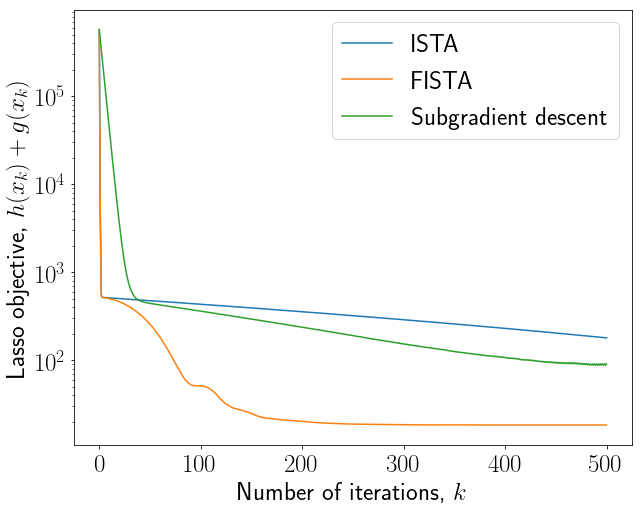

In [33]:
plt.figure(figsize=(10, 8))
fontsize=25
plt.plot([f(x) + gamma * np.linalg.norm(x, 1) for x in conv], label="ISTA")
plt.plot([f(x) + gamma * np.linalg.norm(x, 1) for x in conv_acc], label="FISTA")
plt.plot([f(x) + gamma * np.linalg.norm(x, 1) for x in subgrad_m.get_convergence()], label="Subgradient descent")
plt.legend(fontsize=fontsize)
plt.xlabel(r"Number of iterations, $k$", fontsize=fontsize)
plt.ylabel(r"Lasso objective, $h(x_k) + g(x_k)$", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)
plt.yscale("log")

##  Further directions

1. Non-euclidean distance used as penalty, i.e. Bregman divergence and Mirror descent method 
2. Non-convex optimization
3. Parallel implementations and distributed setting
4. Use different discretization methods from ODE-related science to get new fast optimization methods, see [this paper](https://arxiv.org/pdf/1805.00521.pdf)

## References

1. [Proximal algorithms](http://web.stanford.edu/~boyd/papers/pdf/prox_algs.pdf) and related [sources](http://web.stanford.edu/~boyd/papers/prox_algs.html) by N. Parikh and S. Boyd 
2. [Gradient-based algorithms with applications to signal recovery problems](http://www.math.tau.ac.il/~teboulle/papers/gradient_chapter.pdf) by A. Beck and M. Teboulle
3. [Proximal Backpropagation](https://arxiv.org/abs/1706.04638) by T Frerix et al (ICLR 2018)
4. [Stochastic Proximal Gradient Descent with Acceleration Techniques](https://papers.nips.cc/paper/5610-stochastic-proximal-gradient-descent-with-acceleration-techniques.pdf) by A. Nitanda (NIPS 2014)

## Summary

1. Proximal method
2. Proximal map and its property
3. Proximal gradient method and its acceleration
5. Applications